# Statistics


## Introduction

In this chapter, you'll learn about how to do statistics with code. We already saw some statistics in the chapter on probability and random processes: here we'll focus on computing basic statistics and using statistical tests. We'll make use of the excellent [*pingouin*](https://pingouin-stats.org/index.html) statistics package and its documentation for many of the examples and methods in this chapter {cite}`vallat2018pingouin`. This chapter also draws on Open Intro Statistics {cite}`diez2012openintro`.

### Notation and basic definitions

Greek letters, like $\beta$, are the truth and represent parameters. Modified Greek letters are an estimate of the truth, for example $\hat{\beta}$. Sometimes Greek letters will stand in for vectors of parameters. Most of the time, upper case Latin characters such as $X$ will represent random variables (which could have more than one dimension). Lower case letters from the Latin alphabet denote realised data, for instance $x$ (which again could be multi-dimensional).  Modified Latin alphabet letters denote computations performed on data, for instance $\bar{x} = \frac{1}{n} \displaystyle\sum_{i} x_i$ where $n$ is number of samples. Parameters are given following a vertical bar, for example if $f(x|\mu, \sigma)$ is a probability density function, the vertical line indicates that its parameters are $\mu$ and $\sigma$. The set of distributions with densities $f_\theta(x)$, $\theta \in \Theta$ is called a parametric family, eg there is a family of different distributions that are parametrised by $\theta$.

A **statistic** $T(x)$ is a function of the data $x=(x_1, \dots, x_n)$. 

An **estimator** of a parameter $\theta$ is a function $T=T(x)$ which is used to estimate $\theta$ based on observations of data. $T$ is an unbiased estimator if $\mathbb{E}(T) = \theta$.

If $X$ has PDF $f(x|\theta)$ then, given the observed value $x$ of $X$, the **likelihood** of $\theta$ is defined by $\text{lik}(\theta) = f(x | \theta)$. For independent and identically distributed observed values, then $\text{lik}(\theta) = f(x_1, \dots, x_n| \theta) = \Pi_{i=1}^n f(x_i | \theta)$. The $\hat{\theta}$ such that this function attains its maximum value is the **maximum likelihood estimator (MLE)** of $\theta$.

Given an MLE $\hat{\theta}$ of $\theta$, $\hat{\theta}$ is said to be **consistent** if $\mathbb{P}(\hat{\theta} - \theta > \epsilon) \rightarrow 0$ as $n\rightarrow \infty$.

An estimator *W* is **efficient** relative to another estimator $V$ if $\text{Var}(W) < \text{Var}(V)$.

Let $\alpha$ be the 'significance level' of a test statistic $T$.

Let $\gamma(X)$ and $\delta(X)$ be two statistics satisfying $\gamma(X) < \delta(X)$ for all $X$. If on observing $X = x$, the inference can be made that $\gamma(x) \leq \theta \leq \delta(x)$. Then $[\delta(x), \gamma(x)]$ is an **interval estimate** and $[\delta(X), \gamma(X)]$ is an **interval estimator**. The random interval (random because the *endpoints* are random variables) $[\delta(X), \gamma(X)]$ is called a $100\cdot\alpha \%$ **confidence interval** for $\theta$. Of course, there is a true $\theta$, so either it is in this interval or it is not. But if the confidence interval was constructed many times over using samples, $\theta$ would be contained within it $100\cdot\alpha \%$ of the times.

A **hypothesis test** is a conjecture about the distribution of one or more random variables, and a test of a hypothesis is a procedure for deciding whether or not to reject that conjecture. The **null hypothesis**, $H_0$, is only ever conservatively rejected and represents the default positiion. The **alternative hypothesis**, $H_1$, is the conclusion contrary to this.

A type I error occurs when $H_0$ is rejected when it is true, ie when a *true* null hypothesis is rejected. Mistakenly failing to reject a false null hypothesis is called a type II error.


In the most simple situations, the upper bound on the probability of a type I error is called the size or **significance level** of the *test*. The **p-value** of a random variable $X$ is the smallest value of the significance level (denoted $\alpha$) for which $H_0$ would be rejected on the basis of seeing $x$. The p-value is sometimes called the significance level of $X$. The probability that a test will reject the null is called the power of the test. The probability of a type II error is equal to 1 minus the power of the test.


Recall that there are two types of statistics out there: parametrised, eg by $\theta$, and non-parametrised. The latter are often distribution free (ie don't involve a PDF) or don't require parameters to be specified.

### Imports

First we need to import the packages we'll be using

In [16]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import statsmodels.formula.api as smf
from numpy.random import Generator, PCG64

# Set seed for random numbers
seed_for_prng = 78557
prng = Generator(PCG64(seed_for_prng))

## Basic statistics

Let's start with computing the simplest statistics you can think of using some synthetic data. Many of the functions have lots of extra options that we won't explore here (like weights or normalisation); remember that you can see these using the `help()` method. 

We'll generate a vector with 100 entries:

In [17]:
data = np.array(range(100))
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [18]:
from myst_nb import glue
import sympy
import warnings

warnings.filterwarnings("ignore")
dict_fns = {'mean': np.mean(data),
            'std': np.std(data),
            'mode': stats.mode([0, 1, 2, 3, 3, 3, 5])[0][0],
            'median': np.median(data)}

for name, eval_fn in dict_fns.items():
    glue(name, f'{eval_fn:.1f}')


# Set max rows displayed for readability
pd.set_option('display.max_rows', 6)
# Plot settings
plt.style.use('plot_style.txt')

'49.5'

'28.9'

'3.0'

'49.5'

Okay, let's see how some basic statistics are computed. The mean is `np.mean(data)=` {glue:}`mean`, the standard deviation is `np.std(data)=` {glue:}`std`, and the median is given by `np.median(data)= `{glue:}`median`. The mode is given by `stats.mode([0, 1, 2, 3, 3, 3, 5])[0]=` {glue:}`mode` (access the counts using `stats.mode(...)[1]`).

Less famous quantiles than the median are given by, for example for $q=0.25$,

In [19]:
np.quantile(data, 0.25)

24.75

As with **pandas**, **numpy** and **scipy** work on scalars, vectors, matrices, and tensors: you just need to specify the axis that you'd like to apply a function to:

In [20]:
data = np.fromfunction(lambda i, j: i + j, (3, 6), dtype=int)
data

array([[0, 1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5, 6],
       [2, 3, 4, 5, 6, 7]])

In [21]:
np.mean(data, axis=0)

array([1., 2., 3., 4., 5., 6.])

Remember that, for discrete data points, the $k$th (unnormalised) moment is

$$
\hat{m}_k = \frac{1}{n}\displaystyle\sum_{i=1}^{n} \left(x_i - \bar{x}\right)^k
$$

To compute this use scipy's `stats.moment(a, moment=1)`. For instance for the kurtosis ($k=4$), it's

In [22]:
stats.moment(data, moment=4, axis=1)

array([14.72916667, 14.72916667, 14.72916667])

Covariances are found using `np.cov`.

In [23]:
np.cov(np.array([[0, 1, 2], [2, 1, 0]]))

array([[ 1., -1.],
       [-1.,  1.]])

Note that, as expected, the $C_{01}$ term is -1 as the vectors are anti-correlated.

## Parametric tests

Reminder: parametric tests assume that data are effectively drawn a probability distribution that can be described with fixed parameters.

### One-sample t-test

The one-sample t-test tells us whether a given parameter for the mean, i.e. a suspected $\mu$, is likely to be consistent with the sample mean. The null hypothesis is that $\mu = \bar{x}$. Let's see an example using the default `tail='two-sided'` option. Imagine we have data on the number of hours people spend working each day and we want to test the (alternative) hypothesis that $\bar{x}$ is not $\mu=$8 hours:

In [24]:
x = [8.5, 5.4, 6.8, 9.6, 4.2, 7.2, 8.8, 8.1]

pg.ttest(x, 8).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-1.05,7,two-sided,0.33,"[5.81, 8.84]",0.37,0.52,0.15


(The returned object is a **pandas** dataframe.) We only have 8 data points, and so that is a great big confidence interval! It's worth remembering what a t-statistic and t-test really are. In this case, the statistic that is constructed to test whether the sample mean is different from a known parameter $\mu$ is

$$
T = \frac{\sqrt{n}(\bar{x}-\mu)}{\hat{\sigma}} \thicksim t_{n-1}
$$

where $t_{n-1}$ is the student's t-distribution and $n-1$ is the number of degrees of freedom. The $100\cdot(1-\alpha)\%$ test interval in this case is given by

$$
1 - \alpha = \mathbb{P}\left(-t_{n-1, \alpha/2} \leq \frac{\sqrt{n}(\bar{x} - \mu)}{\hat{\sigma}} \leq t_{n-1,\alpha/2}\right)
$$

where we define $t_{n-1, \alpha/2}$ such that $\mathbb{P}(T > t_{n-1, \alpha/2}) = \alpha/2$. For $\alpha=0.05$, implying confidence intervals of 95%, this looks like:



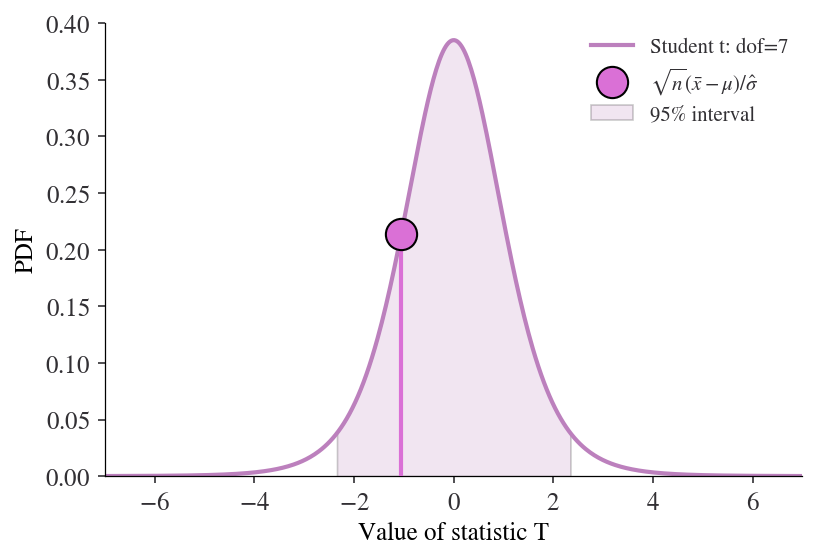

In [25]:
import scipy.stats as st

def plot_t_stat(x, mu):
    T = np.linspace(-7, 7, 500)
    pdf_vals = st.t.pdf(T, len(x)-1)

    sigma_hat = np.sqrt(np.sum( (x-np.mean(x))**2)/(len(x)-1))
    actual_T_stat = (np.sqrt(len(x))*(np.mean(x) - mu))/sigma_hat

    alpha = 0.05
    T_alpha_over_2 = st.t.ppf(1.0-alpha/2, len(x)-1)

    interval_T = T[((T>-T_alpha_over_2) & (T<T_alpha_over_2))]
    interval_y = pdf_vals[((T>-T_alpha_over_2) & (T<T_alpha_over_2))]

    fig, ax = plt.subplots()
    ax.plot(T, pdf_vals, label=f'Student t: dof={len(x)-1}', zorder=2)
    ax.fill_between(interval_T, 0, interval_y, alpha=0.2, label=r'95% interval', zorder=1)
    ax.plot(actual_T_stat, st.t.pdf(actual_T_stat, len(x)-1), 'bo', ms=15, label=r'$\sqrt{n}(\bar{x} - \mu)/\hat{\sigma}}$',
            color='orchid', zorder=4)
    ax.vlines(actual_T_stat, 0, st.t.pdf(actual_T_stat, len(x)-1), color='orchid', zorder=3)
    ax.set_xlabel('Value of statistic T')
    ax.set_ylabel('PDF')
    ax.set_xlim(-7, 7)
    ax.set_ylim(0., 0.4)
    ax.legend(frameon=False)
    plt.show()

mu = 8
plot_t_stat(x, mu)

In this case, we would reject the alternative hypothesis. You can see why from the plot; the test statistic we have constructed lies within the interval where we cannot reject the null hypothesis. $\bar{x}-\mu$ is close enough to zero to give us cause for concern. (You can also see from the plot why this is a two-tailed test: we don't care if $\bar{x}$ is greater or less than $\mu$, just that it's different--and so the test statistic could appear in either tail of the distribution for us to accept $H_1$.)

We accept the null here, but about if there were many more data points? Let's try adding some generated data (pretend it is from making extra observations).


In [26]:
# 'Observe' extra data
extra_data = prng.uniform(5.5, 8.5, size=(30))
# Add it in to existing vector
x_prime = np.concatenate((np.array(x), extra_data), axis=None)
# Run t-test
pg.ttest(x_prime, 8).round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-4.87,37,two-sided,0.0,"[6.69, 7.46]",0.79,1035.6,1.0


Okay, what happened? Our extra observations have seen the confidence interval shrink considerably, and the p-value is effectively 0. There's a large negative t-statistic too. Unsurprisingly, as we chose a uniform distribution that only just included 8 but was centered on $(8-4.5)/2$ *and* we had more points, the test now rejects the null hypothesis that $\mu=8$ . Because the alternative hypothesis is just $\mu\neq8$, and these tests are conservative, we haven't got an estimate of what the mean actually is; we just know that our test rejects that it's $8$.

We can see this in a new version of the chart that uses the extra data:

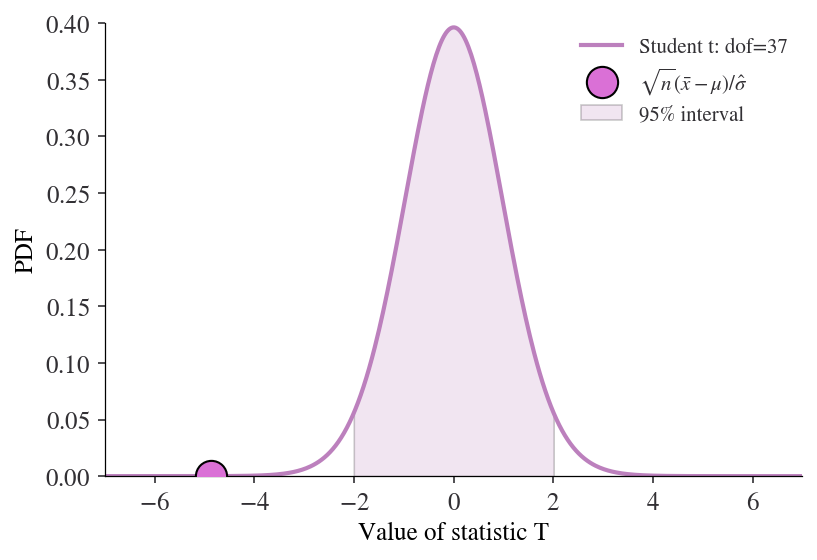

In [27]:
plot_t_stat(x_prime, mu)

Now our test statistic is safely outside the interval.

#### Connection to linear regression

Note that testing if $\mu\neq0$ is equivalent to having the alternative hypothesis that a single, non-zero scalar value is a good expected value for $x$, i.e. that $\mathbb{E}(x) \neq 0$. Which may sound familiar if you've run **linear regression** and, indeed, this t-test has an equivalent linear model! It's just regressing $X$ on a constant--a single, non-zero scalar value. In general, t-tests appear in linear regression to test whether any coefficient $\beta \neq 0$. 

We can see this connection by running a hypothesis test of whether the sample mean is not zero. Note the confidence interval, t-statistic, and p-value.

In [28]:
pg.ttest(x, 0).round(3)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,11.406,7,two-sided,0.0,"[5.81, 8.84]",4.033,2070.596,1.0


And, as an alternative, regressing x on a constant, again noting the interval, t-stat, and p-value:

In [29]:
import statsmodels.formula.api as smf

df = pd.DataFrame(x, columns=['x'])

res = smf.ols(formula='x ~ 1', data=df).fit()
# Show only the info relevant to the intercept (there are no other coefficients)
print(res.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3250      0.642     11.406      0.000       5.806       8.844


Many tests have an equivalent  linear model.

#### Other information provided by **Pingouin** tests

We've covered the degrees of freedom, the T statistic, the p-value, and the confidence interval. So what's all that other gunk in our t-test? Cohen's d is a measure of whether the difference being measured in our test is large or not (this is important; you can have statistically significant differences that are so small as to be inconsequential). Cohen suggested that $d = 0.2$ be considered a 'small' effect size, 0.5 represents a 'medium' effect size and 0.8 a 'large' effect size. BF10 represents the Bayes factor, the ratio (given the data) of the likelihood of the alternative hypothesis relative to the null hypothesis. Values greater than unity therefore favour the alternative hypothesis. Finally, power is the achieved power of the test, which is $1 - \mathbb{P}(\text{type II error})$. A common default to have in mind is a power greater than 0.8.

### Two-sample t-test

The two-sample t-test is used to determine if two population means are equal (with the null being that they *are* equal). Let's look at an example with synthetic data of equal length, which means we can use the *paired* version of this. We'll imagine we are looking at an intervention with a pre- and post- dataset.

In [30]:
pre = [5.5, 2.4, 6.8, 9.6, 4.2, 5.9]
post = [6.4, 3.4, 6.4, 11., 4.8, 6.2]
pg.ttest(pre, post, paired=True, tail='two-sided').round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-2.47,5,two-sided,0.06,"[-1.29, 0.03]",0.25,1.91,0.08


In this case, we cannot reject the null hypothesis that the means are the same pre- and post-intervention.

### Pearson correlation

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, it requires that each dataset be normally distributed. 

In [31]:
mean, cov = [4, 6], [(1, .5), (.5, 1)]
x, y = prng.multivariate_normal(mean, cov, 30).T
# Compute Pearson correlation
pg.corr(x, y).round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.461,"[0.12, 0.7]",0.212,0.154,0.01,5.198,0.747


### Welch's t-test

In the case where you have two samples with unequal variances (or, really, unequal sample sizes too), Welch's t-test is appropriate. With `correction='true'`, it assumes that variances are not equal.


In [32]:
x = prng.normal(loc=7, size=20)
y = prng.normal(loc=6.5, size=15)
pg.ttest(x, y, correction='true')

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1.97091,33,two-sided,0.057169,"[-0.02, 1.17]",0.673194,1.416,0.4815


### One-way ANOVA

Analysis of variance (ANOVA) is a technique for testing hypotheses about means, for example testing the equality of the means of $k>2$ groups. The model would be

$$
X_{ij} = \mu_i + \epsilon_{ij} \quad j=1, \dots, n_i \quad i=1, \dots, k.
$$

so that the $i$th group has $n_i$ observations. The null hypothesis of one-way ANOVA is that $H_0: \mu_1 = \mu_2 = \dots = \mu_k$, with the alternative hypothesis that this is *not* true.

In [33]:
df = pg.read_dataset('mixed_anova')
df.head()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


In [34]:
# Run the ANOVA
pg.anova(data=df, dv='Scores', between='Group', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.459963,1,5.459963,5.243656,0.0232,0.028616
1,Within,185.342729,178,1.041251,NaN,NaN,NaN


### Multiple pairwise t-tests

There's a problem with running multiple t-tests: if you run enough of them, something is bound to come up as significant! As such, some *post-hoc* adjustments exist that correct for the fact that multiple tests are occurring simultaneously. In the example below, multiple pairwise comparisons are made between the scores by time group. There is a corrected p-value, `p-corr`, computed using the Benjamini/Hochberg FDR correction.

In [35]:
pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject',
                   parametric=True, padjust='fdr_bh', effsize='hedges').round(3)

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,Time,August,January,True,True,-1.740,59.0,two-sided,0.087,0.131,fdr_bh,0.582,-0.328
1,Time,August,June,True,True,-2.743,59.0,two-sided,0.008,0.024,fdr_bh,4.232,-0.483
2,Time,January,June,True,True,-1.024,59.0,two-sided,0.310,0.310,fdr_bh,0.232,-0.170


### One-way ANCOVA

Analysis of covariance (ANCOVA) is a general linear model which blends ANOVA and regression. ANCOVA evaluates whether the means of a dependent variable (dv) are equal across levels of a categorical independent variable (between) often called a treatment, while statistically controlling for the effects of other continuous variables that are not of primary interest, known as covariates or nuisance variables (covar).

In [36]:
df = pg.read_dataset('ancova')
df.head()

,Scores,Income,BMI,Method
0,12,17.5,20,A
1,39,104.6,20,A
2,36,64.7,24,A
3,17,47.0,19,A
4,25,22.0,21,A


In [37]:
pg.ancova(data=df, dv='Scores', covar='Income', between='Method')

,Source,SS,DF,F,p-unc,np2
0,Method,571.029883,3,3.336482,0.031940,0.244077
1,Income,1678.352687,1,29.419438,0.000006,0.486920
2,Residual,1768.522313,31,NaN,NaN,NaN


## Non-parametric tests

Reminder: non-parametrics tests do not make any assumptions about the distribution from which data are drawn or that it can be described by fixed parameters.

### Wilcoxon Signed-rank Test

This tests the null hypothesis that two related paired samples come from the same distribution. It is the non-parametric equivalent of the t-test.

In [38]:
x = [20, 22, 19, 20, 22, 18, 24, 20, 19, 24, 26, 13]
y = [38, 37, 33, 29, 14, 12, 20, 22, 17, 25, 26, 16]
pg.wilcoxon(x, y, tail='two-sided').round(2)

,W-val,tail,p-val,RBC,CLES
Wilcoxon,20.5,two-sided,0.29,-0.38,0.4


### Mann-Whitney U Test (aka Wilcoxon rank-sum test)

The Mann–Whitney U test is a non-parametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. It is the non-parametric version of the two-sample T-test.

Like many non-parametric **pingouin** tests, it can take values of tail that are 'two-sided', 'one-sided', 'greater', or 'less'. Below, we ask if a randomly selected value from `x` is greater than one from `y`, with the null that it is not.

In [39]:
x = prng.uniform(low=0, high=1, size=20)
y = prng.uniform(low=0.2, high=1.2, size=20)
pg.mwu(x, y, tail='greater')

,U-val,tail,p-val,RBC,CLES
MWU,133.0,greater,0.966066,0.335,0.3325


### Spearman Correlation

The Spearman correlation coefficient is the Pearson correlation coefficient between the rank variables, and does not assume normality of data.

In [40]:
mean, cov = [4, 6], [(1, .5), (.5, 1)]
x, y = prng.multivariate_normal(mean, cov, 30).T
pg.corr(x, y, method="spearman").round(2)

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,30,0.54,"[0.22, 0.75]",0.29,0.24,0.0,0.89


### Kruskal-Wallace

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes.

In [41]:
df = pg.read_dataset('anova')
df.head()

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48


In [42]:
pg.kruskal(data=df, dv='Pain threshold', between='Hair color')

,Source,ddof1,H,p-unc
Kruskal,Hair color,3,10.58863,0.014172


### The Chi-Squared Test

The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. This test can be used to evaluate the quality of a categorical variable in a classification problem or to check the similarity between two categorical variables.

There are two conditions for a chi-squared test:

- Independence: Each case that contributes a count to the table must be independent of all the other cases in the table.

- Sample size or distribution: Each particular case (ie cell count) must have at least 5 expected cases.

Let's see an example from the **pingouin** docs: whether gender is a good predictor of heart disease. First, let's load the data and look at the gender split in total:

In [43]:
chi_data = pg.read_dataset('chi2_independence')
chi_data['sex'].value_counts(ascending=True)

0     96
1    207
Name: sex, dtype: int64

If gender is *not* a predictor, we would expect a roughly similar split between those who have heart disease and those who do not. Let's look at the observerd versus the expected split once we categorise by gender and 'target' (heart disease or not).

In [44]:
expected, observed, stats = pg.chi2_independence(chi_data, x='sex', y='target')
observed - expected

target,0,1
sex,,
0,-19.222772,19.222772
1,19.222772,-19.222772


So we have fewer in the 0, 0 and 1, 1 buckets than expected but more in the 0, 1 and 1, 0 buckets. Let's now see how the test interprets this:

In [45]:
stats.round(3)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000,22.717,1.0,0.0,0.274,0.997
1,cressie-read,0.667,22.931,1.0,0.0,0.275,0.998
2,log-likelihood,0.000,23.557,1.0,0.0,0.279,0.998
3,freeman-tukey,-0.500,24.220,1.0,0.0,0.283,0.998
4,mod-log-likelihood,-1.000,25.071,1.0,0.0,0.288,0.999
5,neyman,-2.000,27.458,1.0,0.0,0.301,0.999


From these, it is clear we can reject the null and therefore it seems like gender is a good predictor of heart disease.

### Shapiro-Wilk Test for Normality

Note that the null here is that the distribution *is* normal, so normality is only rejected when the p-value is sufficiently small.

In [46]:
x = prng.normal(size=20)
pg.normality(x)

,W,pval,normal
0,0.896262,0.035113,False


The test can also be run on multiple variables in a dataframe:

In [49]:
df = pg.read_dataset('ancova')
pg.normality(df[['Scores', 'Income', 'BMI']], method='normaltest').round(3)

,W,pval,normal
Scores,3.518,0.172,True
Income,1.869,0.393,True
BMI,5.135,0.077,True
